value - northumbria year -2021 month -1


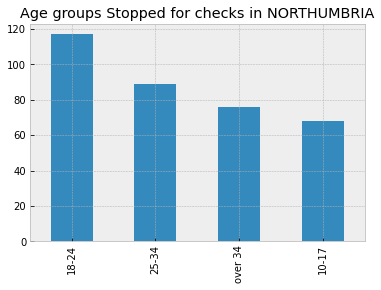

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Gerald\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Gerald\AppData\Local\Temp\ipykernel_18364\2581812163.py", line 88, in <lambda>
    police_button = Button(root, text="Police report", command = lambda: plot_stop_n_search(police.get(), year_box.get(), month_box.get()))
  File "C:\Users\Gerald\AppData\Local\Temp\ipykernel_18364\2581812163.py", line 81, in plot_stop_n_search
    my_display.clear(END, Total_Stop_and_Search)
AttributeError: 'Text' object has no attribute 'clear'


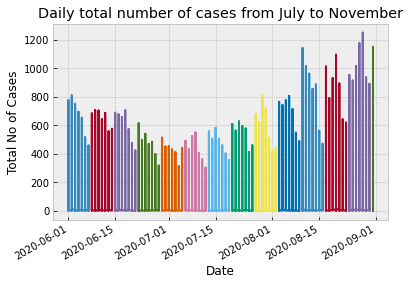

Total positive cases                   1828
kids                                     25
Folks                                  1693
Grand-peeps                            2272
date                    2020-04-01 00:00:00
Week                                     14
Month                                 April
Name: England, dtype: object


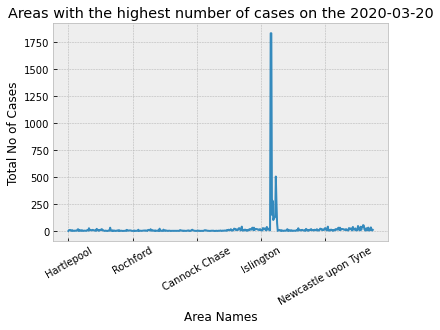

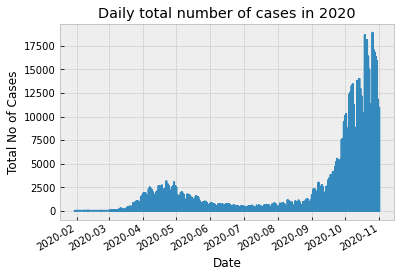

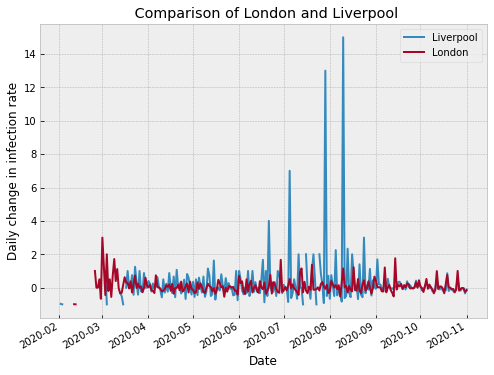

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime as dt
import requests
import seaborn as sb
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from tkinter.ttk import Combobox
root = tk.Tk()

root.geometry("400x600")
root.title("Zeus")

#creating a widget
#myLabel = tk.Label(root, test = "Hello World")
myLabel = tk.Label(root, text="Zeus app (Stop and search / Covid19)")

#packing it on the screen
myLabel.grid(row = 0, column = 4)

# Destroy button
quit = Button(root, text = "Close X", fg = "black", bg = "red", pady = 10, padx = 10, command = root.destroy)
quit.grid(row = 0, column = 6)

# Display police picture
Img1 = ImageTk.PhotoImage(Image.open(("Source/popo.jpg")))
myPhoto = Label(image = Img1 )
myPhoto.grid(row = 2, column = 4)

#Police start and stop function
#Police Force
police = StringVar()
BoxLocation = Combobox(root, textvariable=police)
BoxLocation['values'] = ("bedfordshire", "btp", "north-yorkshire", "city-of-london", "cheshire", "cleveland", "hertfordshire",\
    "cumbria", "derbyshire", "devon-and-cornwall", "dorset", "north-wales", "durham", "dyfed-powys", "essex", "greater-manchester", "gwent", "gloucestershire", \
    "hampshire", "cambridgeshire", "west-midlands","humberside", "kent", "lancashire", "leicestershire", "lincolnshire", "merseyside", "metropolitan", "norfolk", "northamptonshire",\
    "northumbria", "nottinghamshire", "south-wales", "south-yorkshire", "staffordshire", "suffolk", "surrey", "sussex", "thames-valley",\
    "warwickshire", "west-mercia", "west-midlands", "wiltshire","avon-and-somerset")

#Location
BoxLocation.current(30)
BoxLocation["state"] = "readonly"
BoxLocation.grid(row = 3, column = 4)

# Year
year_box = StringVar()
year_box = Combobox(root, textvariable=year_box)
year_box['values'] = ("2020", "2021", "2022")
year_box.current(1)
year_box["state"] = "readonly"
year_box.grid(row = 4, column = 4)

# Month
month_box = StringVar()
month_box = Combobox(root, textvariable=month_box)
month_box['values'] = ("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12")
month_box.current(0)
month_box["state"] = "readonly"
month_box.grid(row = 5, column = 4)

# Function to call Combo box 
def stop_n_search(location, year, month):
    print("value - " + location, "year -" + year, "month -" + month)

    # Read in the data from the URL into a data frame
    df = pd.read_json("https://data.police.uk/api/stops-force?force="+location+"&date="+year+"-"+month)
    df.sort_values(by = "datetime", ascending = True, inplace = True)  
    return df

def plot_stop_n_search(location, year, month):
    df = stop_n_search(police.get(), year_box.get(), month_box.get())
    plt.style.use("bmh")
    df["age_range"].value_counts().plot(kind = "bar", title = "Age groups Stopped for checks in "+location.upper())
    plt.show()

    # Display area to show the text
    Total_Stop_and_Search = str(len(df["involved_person"]))+ " persons were stopped and searched by the "+location+" Police in the period "+year+"-"+month
    my_display.insert(END, Total_Stop_and_Search)
    my_display.clear(END, Total_Stop_and_Search)

# Displat box filed
my_display = Text(root, height = 4, width = 40)
my_display.grid(row = 6, column = 4, columnspan = 3)

#create stop and search button
police_button = Button(root, text="Police report", command = lambda: plot_stop_n_search(police.get(), year_box.get(), month_box.get()))
police_button.grid(row = 7, column = 4)

# Demacation section
space = Label(root, text = "",padx = 10, pady = 8)
space.grid(row = 8, column = 1)

# Display virus picture
Img2 = ImageTk.PhotoImage(Image.open(("Source/Virus.jpg")))
myPhoto = Label(image = Img2 )
myPhoto.grid(row = 9, column = 4)

#covid section
def import_data():
    cov19 = pd.read_csv("source/specimenDate_ageDemographic-unstacked.csv", parse_dates=["date"])
    cov19["Total positive cases"] = cov19["newCasesBySpecimenDate-0_59"]
    
    # Distribution by age group
    cov19["kids"] = cov19["newCasesBySpecimenDate-0_4"] + cov19["newCasesBySpecimenDate-5_9"]
    cov19["Teens"] = cov19["newCasesBySpecimenDate-10_14"] + cov19["newCasesBySpecimenDate-15_19"] + cov19["newCasesBySpecimenDate-20_24"]
    cov19["Folks"] = cov19["newCasesBySpecimenDate-25_29"] + cov19["newCasesBySpecimenDate-30_34"] + cov19["newCasesBySpecimenDate-35_39"] + cov19["newCasesBySpecimenDate-40_44"] + cov19["newCasesBySpecimenDate-45_49"] + cov19["newCasesBySpecimenDate-50_54"] + cov19["newCasesBySpecimenDate-55_59"]
    cov19["Grand-peeps"] = cov19["newCasesBySpecimenDate-60_64"] + cov19["newCasesBySpecimenDate-65_69"] + cov19["newCasesBySpecimenDate-70_74"] + cov19["newCasesBySpecimenDate-75_79"] + cov19["newCasesBySpecimenDate-80_84"] + cov19["newCasesBySpecimenDate-85_89"] + cov19["newCasesBySpecimenDate-90+"] 

    # Date into Months and weeks
    cov19["Month"] = cov19["date"].dt.month_name()
    cov19["Week"] = cov19["date"].dt.isocalendar().week

    # location
    cov19["Location"] = cov19["areaName"]

    #Final data
    cov19 = cov19[["Total positive cases", "kids", "Folks", "Grand-peeps", "date", "Week", "Month", "Location"]]

    #sort by date
    cov19.sort_values(by = "date")
    
    return cov19

def plot_data():
    cov19 = import_data()
    
    # Daily total number of cases in summer months of 2020
    filtered_cov19 = cov19[(cov19['date'] >= '2020-06-01') & (cov19['date'] <= '2020-08-31')]

    filtered_cov19 = filtered_cov19.set_index("date")
    filtered_cov19["Total positive cases"].resample('W').plot()
    plt.title("Daily total number of cases from July to November")
    plt.ylabel("Total No of Cases")
    plt.xlabel("Date")
    plt.show()
    
    #Areas the highest number of cases on a 2020-01-01
    day = "2020-04-01"
    filtered_cov19 = cov19[cov19["date"] == day]
    filtered_cov19 = filtered_cov19.set_index("Location")
    print(filtered_cov19.loc[filtered_cov19["Total positive cases"].idxmax()])
    filtered_cov19["Total positive cases"].plot()
    plt.title("Areas with the highest number of cases on the 2020-03-20")
    plt.ylabel("Total No of Cases")
    plt.xlabel("Area Names")
    plt.xticks(rotation=30)
    plt.show()
    
    # Daily total number of cases in 2020
    filtered_cov19 = cov19.set_index("date")
    filtered_cov19["Total positive cases"].plot()
    plt.title("Daily total number of cases in 2020")
    plt.ylabel("Total No of Cases")
    plt.xlabel("Date")
    plt.show()
    
    # Comparison of London and liverpool
    cov19["Daily percentage Change"] = cov19["Total positive cases"].pct_change()
    # filter by date
    filtered_cov19 = cov19[(cov19['date'] >= '2020-02-01') & (cov19['date'] <= '2020-11-08')]
    filtered_cov19 = filtered_cov19.set_index("date")
    # Area list
    areas = ["London","Liverpool"]
    filtered_cov19 = filtered_cov19[filtered_cov19['Location'].isin(areas)]
    # group by area
    fig, ax = plt.subplots(figsize=(8,6))
    for label, sample_cov19 in filtered_cov19.groupby('Location'):
        sample_cov19["Daily percentage Change"].plot(kind="line", ax=ax, label=label)
    plt.legend()
    plt.title(" Comparison of London and Liverpool")
    plt.ylabel("Daily change in infection rate")
    plt.xlabel("Date")
    plt.show() 
    
#create covid19 button
covid19_button = Button(root, text="Covid 19 report", command=plot_data)
covid19_button.grid(row = 10, column = 4)

#Pack it all in
root.mainloop()